# Chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/

## Quickstart

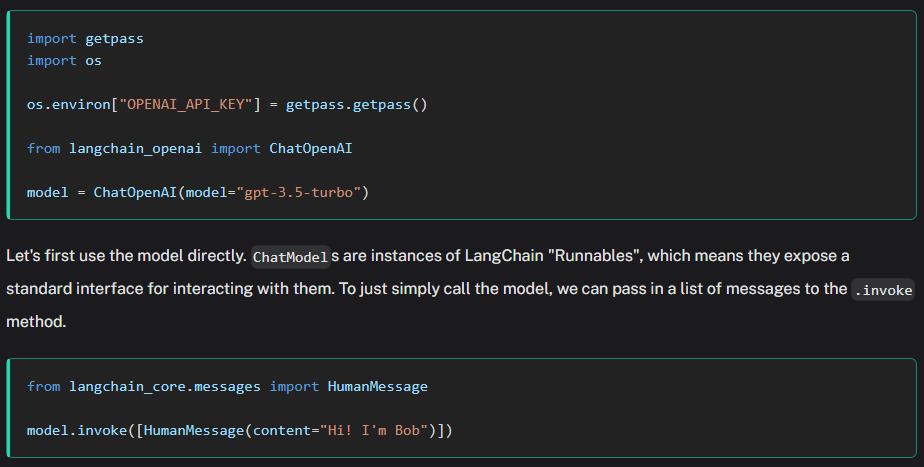

In [1]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv

load_dotenv()

model = ChatOpenAI(model='gpt-4.1-nano')

ai_message = model.invoke([HumanMessage(content='Hi, I`m Bob')])

ai_message.content

'Hi Bob! How can I assist you today?'

In [2]:
ai_message_02 = model.invoke('what`s my name?')

ai_message_02.content

"I'm sorry, but I don't know your name."

In [3]:
ai_message_03 = model.invoke([HumanMessage(content='what`s my name?')])

ai_message_03.content

"I'm sorry, but I don't know your name."

In [6]:
from langchain_core.messages import AIMessage

ai_message_04 = model.invoke(
    [
        HumanMessage(content='Hi I`m Bob.'),
        AIMessage(content='Hello Bob! How can I assist you today?'),
        HumanMessage(content='What`s my name?')
    ]
)

ai_message_04.content

'Your name is Bob.'

## Message History

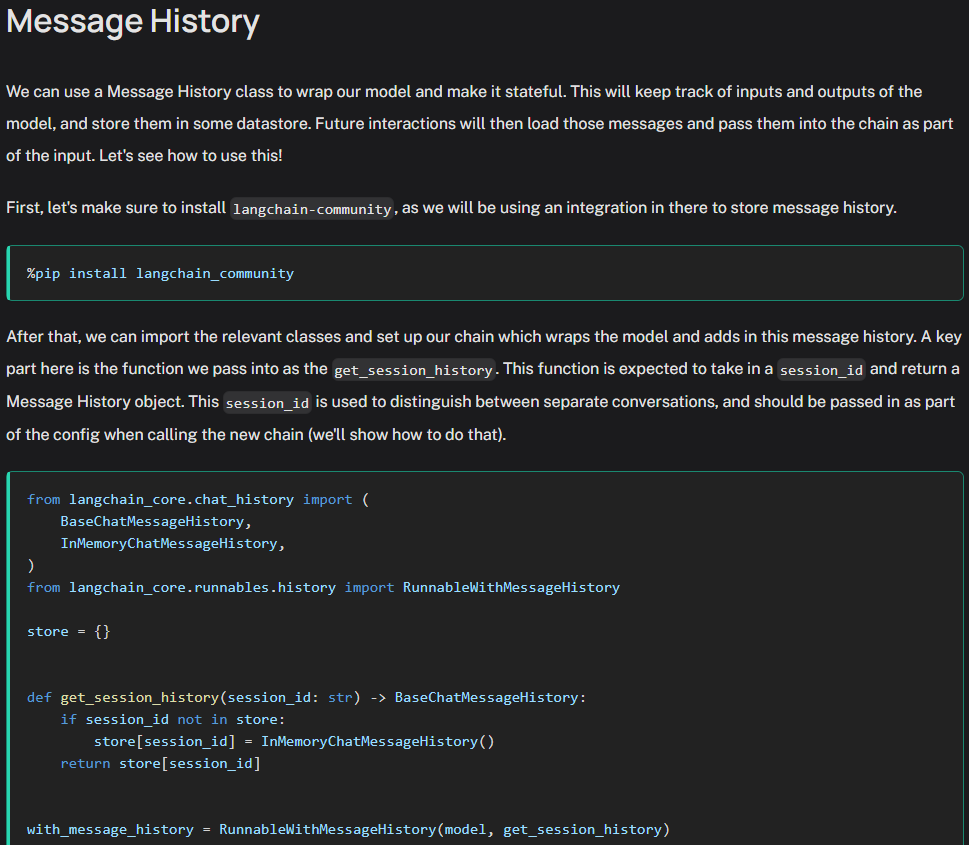

In [31]:
from langchain_core.chat_history import(
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [32]:
config = {'configurable': {'session_id': 'abc2'}}

In [33]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi I`m Bob')],
    config=config,
)

response.content

'Hi Bob! How can I assist you today?'

In [34]:
response = with_message_history.invoke(
    [HumanMessage(content='What`s my name?')],
    config=config
)

response.content

'Your name is Bob.'

In [35]:
config = {'configurable': {'session_id': 'abc3'}}

response = with_message_history.invoke(
    [HumanMessage(content='what`s my name?')],
    config=config,
)

response.content

"I'm sorry, but I don't know your name."

In [36]:
config = {'configurable': {'session_id': 'abc2'}}

response = with_message_history.invoke(
    [HumanMessage(content='what`s my name?')],
    config=config,
)

response.content

'Your name is Bob.'

In [41]:
get_session_history('abc2').messages

[HumanMessage(content='Hi I`m Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-Bc11WYiFum0bxpYRah13EPTY4egv4', 'finish_reason': 'stop', 'logprobs': None}, id='run--fb0f2595-d038-4e5d-a862-8a1effa6b300-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='What`s my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yo

In [ ]:
## 첫 번째 질문 : HumanMessage 출력
type(get_session_history('abc2').messages)

list

In [47]:
get_session_history('abc2').messages[0].content

'Hi I`m Bob'

In [ ]:
HumanMessage_1 = [msg for msg in get_session_history('abc2').messages if isinstance(msg, HumanMessage)]
for msg in HumanMessage_1:
    print(f'HumanMessage: {msg.content}')
print('\n')

HumanMessage: Hi I`m Bob
HumanMessage: What`s my name?
HumanMessage: what`s my name?




In [65]:
for message in get_session_history('abc2').messages:
    print(message.content)
    print('*'*50)

Hi I`m Bob
**************************************************
Hi Bob! How can I assist you today?
**************************************************
What`s my name?
**************************************************
Your name is Bob.
**************************************************
what`s my name?
**************************************************
Your name is Bob.
**************************************************


## Prompt Templates

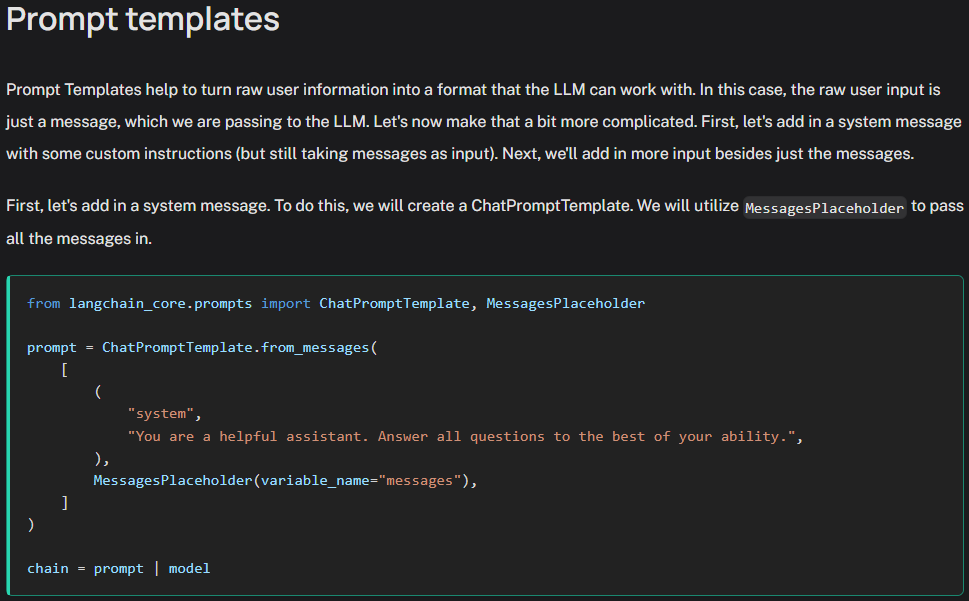

In [69]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [('system', 'You are a helpful assistant. Answer all questinos to the best of your ability.'),
    MessagesPlaceholder(variable_name='messages'),])

chain = prompt | model

In [ ]:
response = chain.invoke({'messages':[HumanMessage(content='Hi, I`m Bob.')]})

response.content

'Hi Bob! How can I assist you today?'

In [71]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)
config = {'configurable': {'session_id': 'abc5'}}
response = with_message_history.invoke(
    [HumanMessage(content='Hi I`m Jim')],
    config=config
)

response.content

'Hello Jim! Nice to meet you. How can I assist you today?'

In [72]:
response = with_message_history.invoke(
    [HumanMessage(content='What`s my name?')],
    config=config
)

response.content

'Your name is Jim.'

In [84]:
for message in get_session_history('abc5').messages:
    print(f'[{message.type.upper()}]: {message.content}')

[HUMAN]: Hi I`m Jim
[AI]: Hello Jim! Nice to meet you. How can I assist you today?
[HUMAN]: What`s my name?
[AI]: Your name is Jim.


In [86]:
for message in get_session_history('abc5').messages:
    if message.type == 'human':
        print(f'[{message.type.upper()}]: {message.content}')

[HUMAN]: Hi I`m Jim
[HUMAN]: What`s my name?


In [73]:
prompt = ChatPromptTemplate.from_messages(
    [('system', 'You are a helpful assistant. Answer all questions to the best of your ability in {language}.',),
     MessagesPlaceholder(variable_name='messages')],
)

chain = prompt | model

In [74]:
response = chain.invoke(
    {'messages': [HumanMessage(content='hi! I`m bob')], 'language': 'Spanish'}
)

response.content

'¡Hola, Bob! Encantado de conocerte. ¿En qué puedo ayudarte hoy?'

In [87]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key='messages'
)

config = {'configurable': {'session_id': 'abc11'}}

response = with_message_history.invoke(
    {'messages': [HumanMessage(content='hi! I`m todd')], 'language': 'Spanish'},
    config=config,
)

response.content

'¡Hola, Todd! Encantado de conocerte. ¿En qué puedo ayudarte hoy?'

In [92]:
response = with_message_history.invoke(
    {'messages': [HumanMessage(content='what`s my name?')], 'language': 'Spanish'},
    config=config
)

response.content

'Tu nombre es Todd.'

## Managing Conversation History

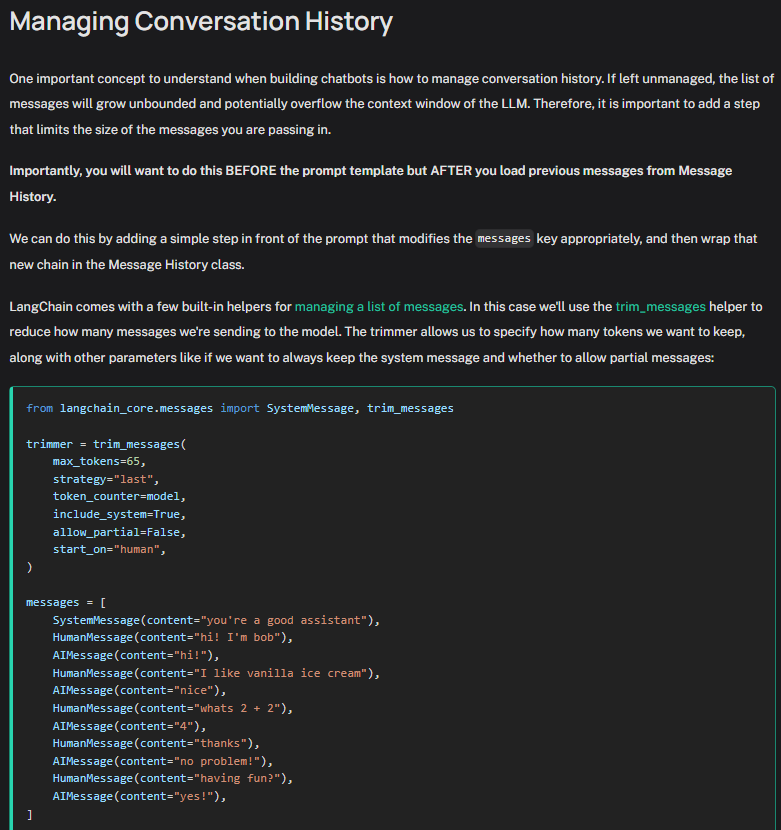

In [ ]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

TypeError: 'RunnableLambda' object is not callable